In [39]:
import numpy as np
import pandas as pd
import matplotlib
import sklearn
import os
import tarfile
import seaborn as sns
from six.moves import urllib

In [40]:
'''
from sklearn.datasets import load_boston
X, y = load_boston(return_X_y=True)
print(X.shape)
'''

'\nfrom sklearn.datasets import load_boston\nX, y = load_boston(return_X_y=True)\nprint(X.shape)\n'

In [41]:
from sklearn.datasets import load_boston
data = load_boston()
housing = pd.DataFrame(data.data,columns=data.feature_names)
housing['target']=pd.Series(data.target)

In [42]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [43]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [44]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


###### only in a Jupyter notebook

In [45]:
%matplotlib inline 

In [46]:
import matplotlib.pyplot as plt

##### create histograms of the data

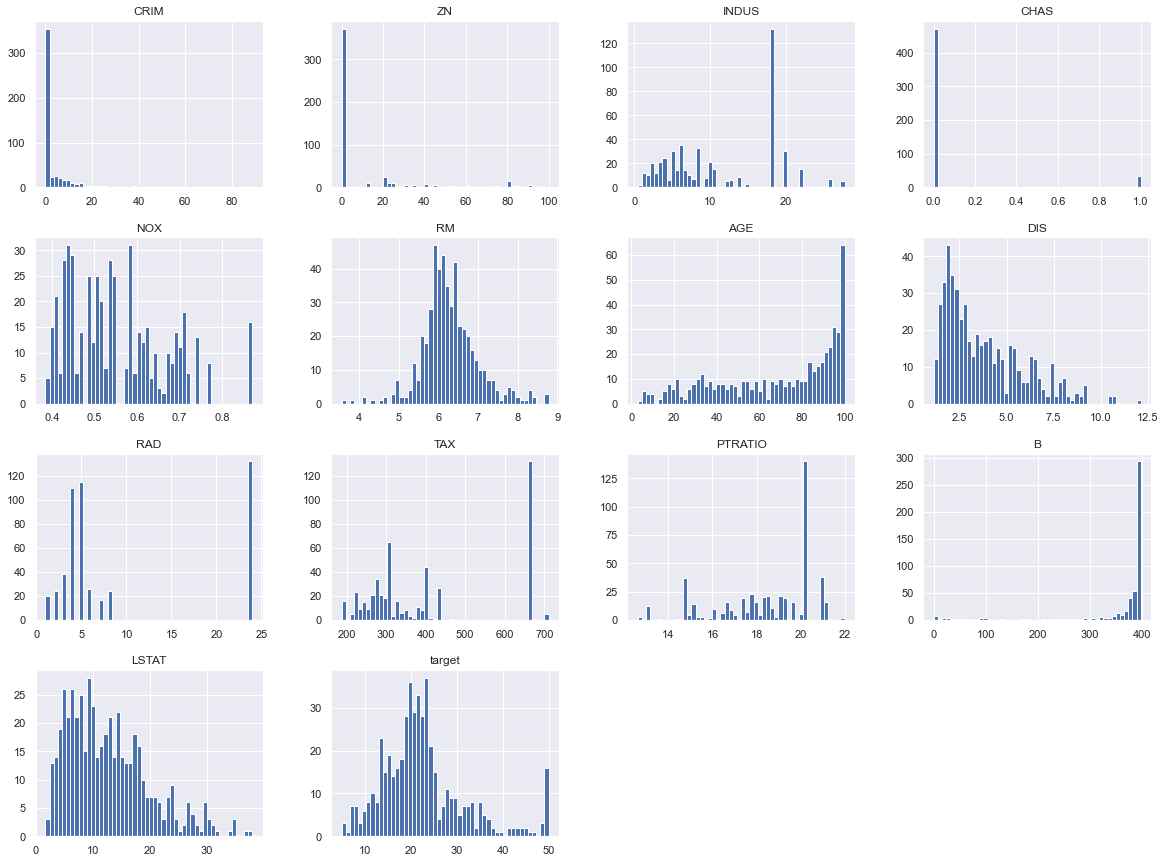

In [47]:
housing.hist(bins=50, figsize=(20,15)); # semi-colon at the end suppresses unneeded code output

##### add a row index

In [48]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]
    
housing_with_id = housing.reset_index()

In [49]:
housing_with_id

,index,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


##### creating train and test data sets

In [50]:
train_set, test_set = split_train_test_by_id(housing_with_id,0.2,"index")

In [63]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing_with_id, test_size=0.2, random_state=42)

In [64]:
len(train_set)

404

In [65]:
len(test_set)

102

##### copy training data set to "housing" (working copy of data)

In [66]:
housing = train_set.copy()

##### create correlation matrix for features

In [67]:
corr_matrix = housing.corr()

In [68]:
corr_matrix["target"].sort_values(ascending=False)

target     1.000000
RM         0.710680
B          0.339918
ZN         0.309504
DIS        0.235114
CHAS       0.190642
index     -0.212602
AGE       -0.340216
CRIM      -0.380091
RAD       -0.387467
NOX       -0.415768
TAX       -0.459795
INDUS     -0.470546
PTRATIO   -0.491210
LSTAT     -0.736422
Name: target, dtype: float64

##### correlation matrix with heatmap

<AxesSubplot:>

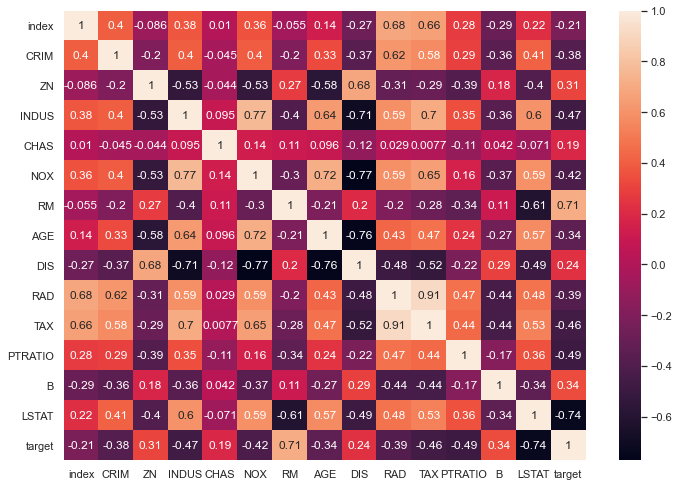

In [69]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(data=corr_matrix,annot=True)

note: TAX and RAD are very strongly correlated (.91), which is a concern for multi-colinearity.  This is also true for DIS and AGE (-.75).  So we should not include both features in either of these pairs for our model.  The best correlated features appear to be RM (average number of rooms per dwelling) and LSTAT (% lower status of the population), with PTRATIO (pupil-teacher ratio) following.  

##### scatter matrix
selected the most positively and negatively correlated features from the correlation matrix

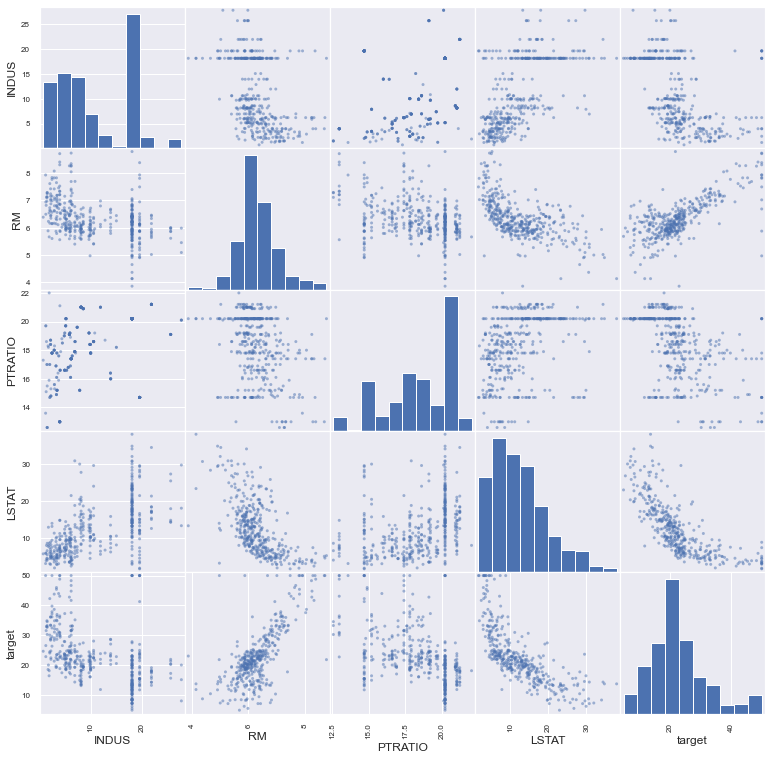

In [70]:
from pandas.plotting import scatter_matrix
attributes = ['INDUS','RM','PTRATIO','LSTAT','target']
scatter_matrix(housing[attributes],figsize=(13,13));

##### create copy of housing DataFrame without target feature (median_house_value in book/California data)

In [75]:
housing = train_set.drop("target",axis=1)

In [76]:
housing_labels = train_set["target"]

In [78]:
housing_num = housing

_continue using "housing" instead of "housing_num", as all features are numeric_

##### determine median values for features with missing values (none in the current dataset) 

In [95]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(housing)
imputer.statistics_

array([2.49500e+02, 2.61390e-01, 0.00000e+00, 8.56000e+00, 0.00000e+00,
       5.38000e-01, 6.21000e+00, 7.77000e+01, 3.17575e+00, 5.00000e+00,
       3.30000e+02, 1.87000e+01, 3.91305e+02, 1.09250e+01])

In [96]:
X = imputer.transform(housing)

In [97]:
housing_tr = pd.DataFrame(X, columns=housing.columns)

##### create transformation pipeline (for imputer and StandardScaler)

In [141]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ("imputer" , SimpleImputer(strategy = "median")),
    ("std_scaler" , StandardScaler()),
])

housing_num_tr = pipeline.fit_transform(housing_num)

In [142]:
housing_num_tr

array([[ 1.59381791,  1.28770177, -0.50032012, ...,  0.84534281,
        -0.07433689,  1.75350503],
       [-1.65611846, -0.33638447, -0.50032012, ...,  1.20474139,
         0.4301838 , -0.5614742 ],
       [ 0.57381624, -0.40325332,  1.01327135, ..., -0.63717631,
         0.06529747, -0.65159505],
       ...,
       [ 0.68636815, -0.40547014,  2.95931752, ..., -0.59225149,
         0.37901005, -0.91069248],
       [ 1.29836915,  0.85189733, -0.50032012, ...,  0.84534281,
        -2.69458597,  1.52257036],
       [-1.04411745, -0.38135592, -0.50032012, ...,  1.15981657,
        -3.12158061, -0.25731635]])

##### apply standardization

In [99]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [101]:
housing_prepared = scaler.fit_transform(housing)

In [102]:
housing_prepared

array([[ 1.59381791,  1.28770177, -0.50032012, ...,  0.84534281,
        -0.07433689,  1.75350503],
       [-1.65611846, -0.33638447, -0.50032012, ...,  1.20474139,
         0.4301838 , -0.5614742 ],
       [ 0.57381624, -0.40325332,  1.01327135, ..., -0.63717631,
         0.06529747, -0.65159505],
       ...,
       [ 0.68636815, -0.40547014,  2.95931752, ..., -0.59225149,
         0.37901005, -0.91069248],
       [ 1.29836915,  0.85189733, -0.50032012, ...,  0.84534281,
        -2.69458597,  1.52257036],
       [-1.04411745, -0.38135592, -0.50032012, ...,  1.15981657,
        -3.12158061, -0.25731635]])

In [103]:
housing_prepared.shape

(404, 14)

In [104]:
type(housing_prepared)

numpy.ndarray

##### DataFrame selector

In [105]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values
    
num_attribs = list(housing)
cat_attribs = []

_note: DataFrameSelector not used as there are no categorical features to choose from_

In [179]:
housing_prepared.shape

(404, 14)

##### select and train a model

In [180]:
from sklearn.linear_model import LinearRegression

In [181]:
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [183]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = pipeline.transform(some_data) 
print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [10.65417394 20.00237624 22.59060124 12.10028302 18.89422372]


In [184]:
print("Labels:", list(some_labels))

Labels: [12.0, 19.9, 19.4, 13.4, 18.2]


##### measure this model's RMSE

In [191]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

4.639693462368617